# LogisticRegression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('A.csv')
data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [3]:
df=data.dropna()
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [4]:
df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result'], dtype='object')

In [5]:
x = df.drop(labels='Result', axis=1)
y = df.loc[:,'Result']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  1136
Number of test dataset     :  285
Total number of dataset    :  1421


In [7]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [8]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predicted = LR.predict(x_test)

In [9]:
cr = classification_report(y_test,predicted)
print('Classification report of LogisticRegression Result is:',cr)
print("\n")

Classification report of LogisticRegression Result is:               precision    recall  f1-score   support

           0       1.00      0.99      0.99       161
           1       0.98      1.00      0.99       124

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285





In [10]:
cm = confusion_matrix(y_test,predicted)
print('Confusion Matrix result of LogisticRegression is:',cm)
print("\n")

Confusion Matrix result of LogisticRegression is: [[159   2]
 [  0 124]]




In [11]:
accuracy = cross_val_score(LR, x, y, scoring='accuracy')
print('Cross validation test results of accuracy:', accuracy)
print("\n")

Cross validation test results of accuracy: [0.99649123 0.98591549 0.99295775 0.98943662 0.97887324]




In [12]:
a = accuracy.mean() * 100
print("Accuracy Result of LogisticRegression is:",a)

Accuracy Result of LogisticRegression is: 98.8734865332345


Confusion matrix-LogisticRegression:
[[159   2]
 [  0 124]]


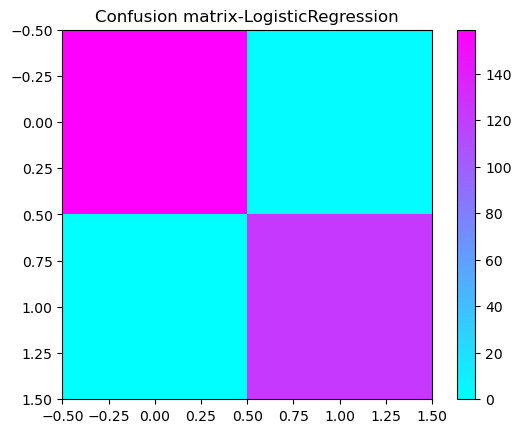

In [13]:
def plot_confusion_matrix(cm, title='Confusion matrix-LogisticRegression', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('Confusion matrix-LogisticRegression:')
print(cm)
plot_confusion_matrix(cm)

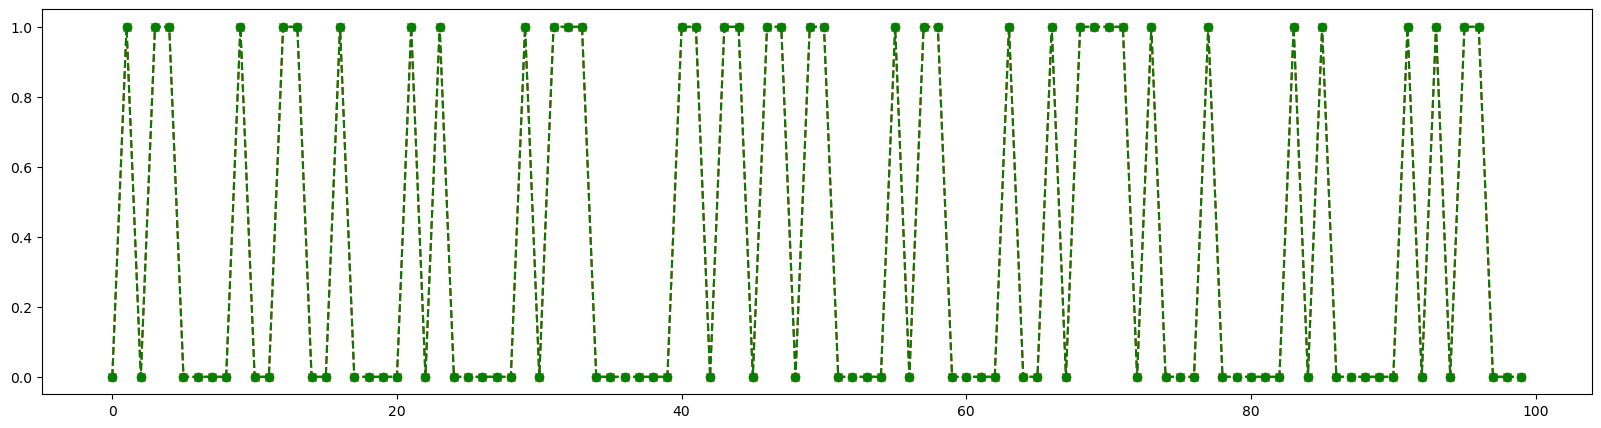

In [14]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()